In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import sys
sys.path.insert(0, "../"*2)
import warnings
warnings.filterwarnings('ignore')

In [81]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, Decay
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

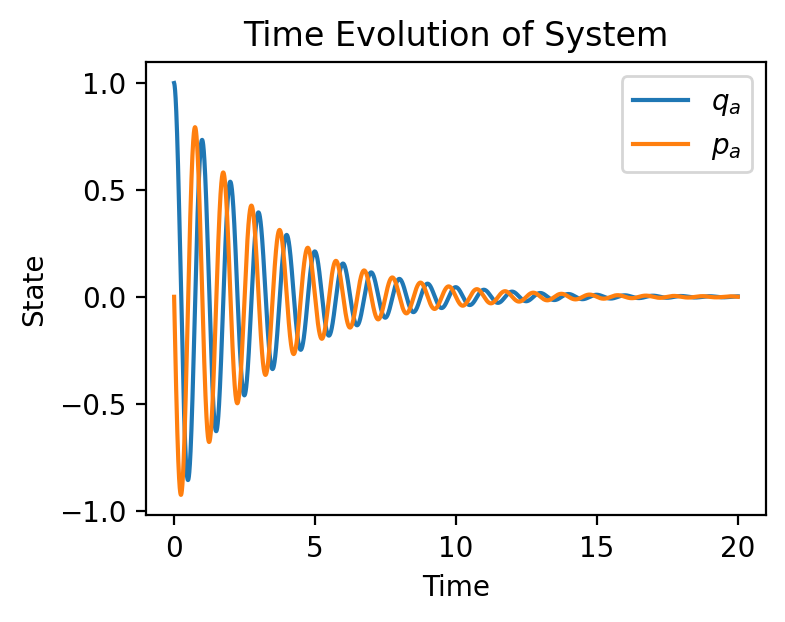

In [82]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 2*np.pi*1.0, "kappa_a": 0.0, "kerr_a":0.0, "gamma_a":2*np.pi*0.100}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 20, 100001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

We fit a decaying sinusoid of the form: $ a e^{- (\lambda/2) t} \cos(\omega t + \phi_0)$

In [83]:
decay = Decay(sys, x_0, ts)
decay.calculate(X)

array([0.6204416, 0.6204416])

In [84]:
decay.sensitivity("gamma_a")

array([1.00006163, 1.00006157])

In [85]:
dps=np.array([50,10,5,2,1,.5,.2,.1,1e-2,1e-3,1e-4,1e-6, 1e-7, 1e-8])
sensitivities = []
for dp in tqdm(dps):
    sensitivities.append(decay.sensitivity("gamma_a", dp=dp))
sensitivities = np.array(sensitivities)

print(sensitivities)
    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:34<00:00,  2.48s/it]

[[1.00163554 1.00163554]
 [1.00037559 1.00037559]
 [1.00021839 1.00021839]
 [1.0001241  1.0001241 ]
 [1.00009268 1.00009268]
 [1.00007697 1.00007697]
 [1.00006754 1.00006754]
 [1.00006444 1.0000644 ]
 [1.00006163 1.00006157]
 [1.00006374 1.00006129]
 [1.00006451 1.00006126]
 [1.00014565 1.00006125]
 [1.02581892 1.00006123]
 [1.29185199 1.00006115]]


In [88]:
def plot_s(n, ax):
    ax.plot(-np.log10(dps[:n]), s[:n,0], "*--", label= "$q_a$ decay")
    ax.plot(-np.log10(dps[:n]), s[:n,1], "*--", label="$p_a$ decay")
    ax.set_xlabel("-log10(dp)")
    ax.set_ylabel("$\\frac{d\lambda}{d\gamma_a}$")
    ax.set_title("Sensitivity Analysis")
    ax.axhline(1, color="r",ls="-", label="1")
    ax.legend()

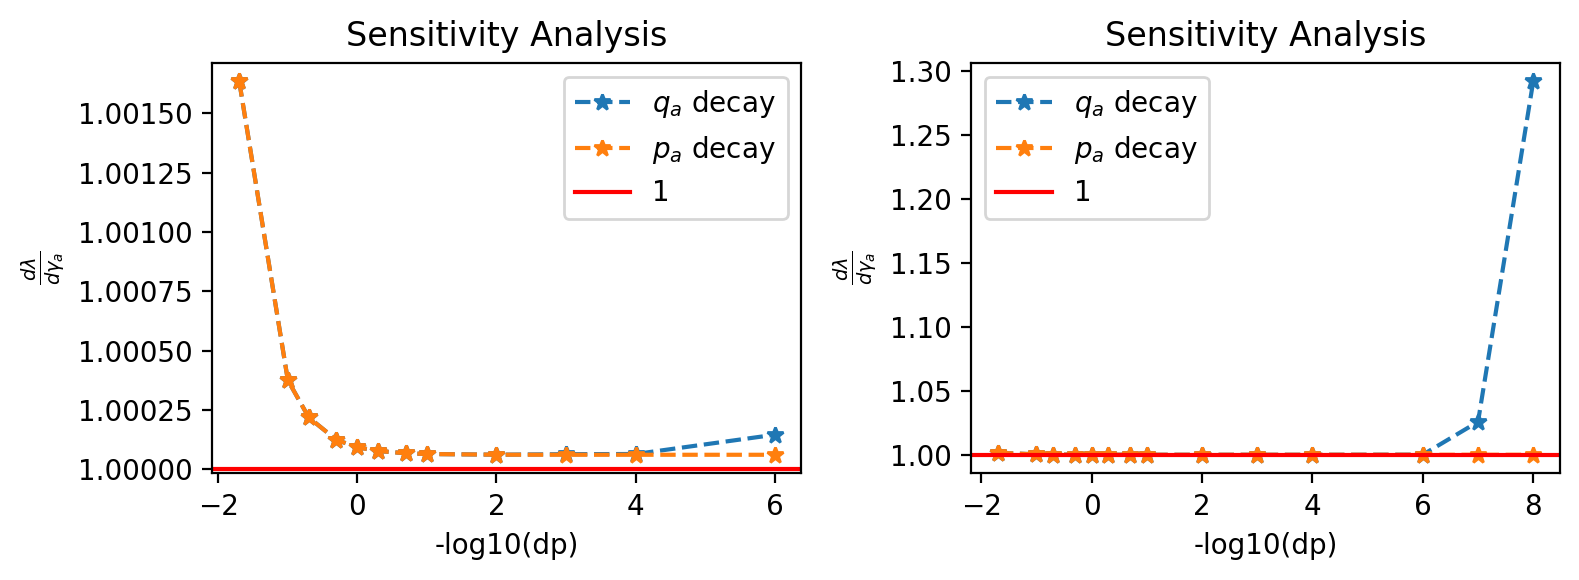

In [89]:
fig, axs = plt.subplots(1,2,dpi=200,figsize=(8,3)) 
epsilon = 1e-7

# min_sensitivity = np.min(sensitivities) - epsilon
# s = np.log10(sensitivities - min_sensitivity)

s = sensitivities
plot_s(dps.size-2, axs[0])
plot_s(dps.size, axs[1])

fig.tight_layout()

plt.show()